<a href="https://colab.research.google.com/github/Rohitnith/Small-Data-Science-Projects/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent 
Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning(DL) to minimise a cost/loss function.
This notebook illustrates the implementation of gradient descent using python.

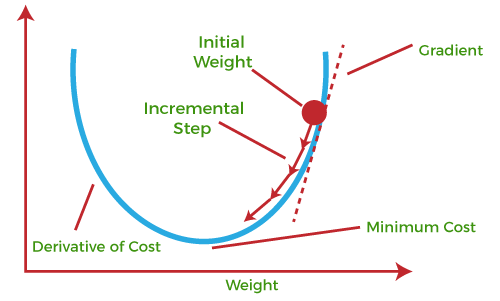

In [ ]:
#Importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading and understanding data
data= pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Gradient descent\data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


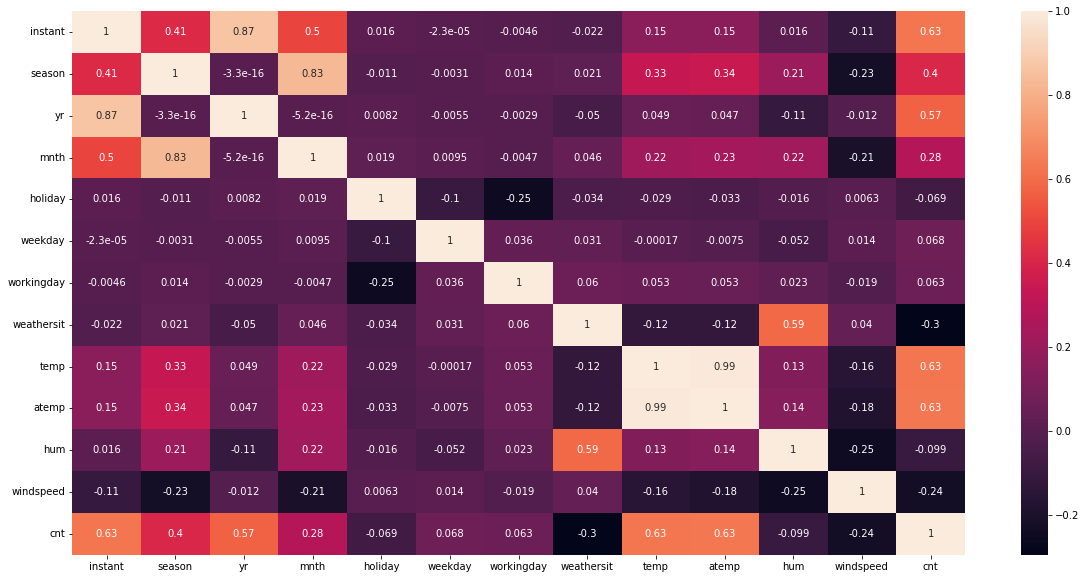

In [ ]:
#Lets plot heatmap to check correlation
data= data.drop(["registered","casual"], axis=1)
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(), annot =True)
plt.show()

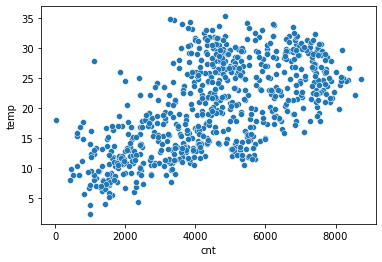

In [ ]:
#maximum correlation of cnt is with temp feature
#lets check varaition using scatter plot
sns.scatterplot(data.cnt, data.temp)
plt.show()

In [ ]:
#lets us implement gradient descent between cnt and temp
X_temp=data.temp
y_cnt=data.cnt

In [ ]:
#let us convert these vales into array in order to iterate
X=np.array(X_temp)
y=np.array(y_cnt)

As we know for gradient descent, Cost function is given as

                   J(m,x)= [sum(y-y`)^2]/N

Where, y = m * x + c

      y`= predicted values
      
      N is size of dataset

In [ ]:
#defining function for gradient descent
def gradient(X, y, m_current=0, c_current=0, iters=20000, learning_rate =0.001):
    N = float(len(y))
    global df
    df = pd.DataFrame(columns = ['m_current','c_current','cost_func'])
    for i in range(iters): 
        y_current = (m_current* X) + c_current
        cost_func = sum([j**2 for j in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y-y_current))
        c_gradient = -(2/N) * sum(y-y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        df.loc[i] = [m_current,c_current,cost_func]
    return(df)

In [ ]:
gradient(X, y)

,m_current,c_current,cost_func
0,201.399558,9.016014,2.406513e+07
1,213.461092,9.829416,2.525337e+06
2,214.172328,10.151028,2.447845e+06
3,214.203147,10.443094,2.447483e+06
4,214.193179,10.733323,2.447397e+06
...,...,...,...
19995,162.154190,1211.945194,2.271328e+06
19996,162.154086,1211.947611,2.271328e+06
19997,162.153981,1211.950028,2.271328e+06
19998,162.153876,1211.952444,2.271328e+06


In [ ]:
print(df[df.cost_func==df.cost_func.min()])

        m_current    c_current     cost_func
19999  162.153772  1211.954859  2.271328e+06


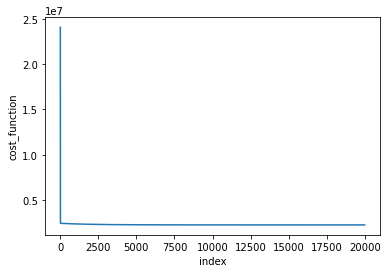

In [ ]:
#ploting cost function with no. of iterations
plt.plot(df.index, df.cost_func)
plt.xlabel("index")
plt.ylabel("cost_function")
plt.show()

In [ ]:
# Now lets implement Linear Regression to cross verification
X_=X_temp.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_,y_cnt)
print(lr.coef_)
print(lr.intercept_)


[161.71684954]
1222.0402637615812


y_pred = 161.71684954 * X + 1222.0402637615812

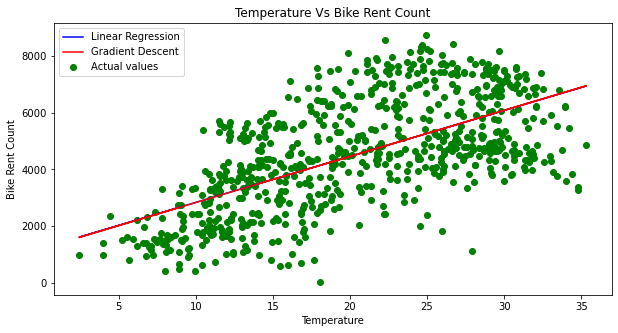

In [ ]:
#Lets check the fitting through linear regression and gradient descent
plt.figure(figsize = (10, 5))
plt.scatter(data.temp,data.cnt, color= "g", label="Actual values")
plt.plot(X,161.71684954*X + 1222.0402637615812, color='b', label="Linear Regression")
plt.plot(X,162.153772*X + 1211.954859, color='r', label="Gradient Descent")
plt.xlabel("Temperature")
plt.ylabel("Bike Rent Count")
plt.title("Temperature Vs Bike Rent Count")
plt.legend(loc='upper left')
plt.show()

As seen above, Linear Regression and Gradient Descent has converged to almost same line, which is not surprising as Linear Regression works on principle of Gradient Descent.